In [ ]:
import pandas as pd
df = pd.read_csv("/content/Farm_Weather_Data.csv")
print(df.head())


             Date  MaxT  MinT  WindSpeed  Humidity   Precipitation
0   1/8/2006 0:00  29.5  21.8        1.6       70.2            0.0
1   1/9/2006 0:00  30.1  21.0        1.6       67.4            0.0
2  1/10/2006 0:00  29.9  21.1        1.7       65.2            0.0
3  1/11/2006 0:00  29.8  20.8        1.5       69.0            0.0
4  1/12/2006 0:00  29.6  20.5        2.1       69.5            0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/Farm_Weather_Data.csv")
print(df.head())
print(df.info())


             Date  MaxT  MinT  WindSpeed  Humidity   Precipitation
0   1/8/2006 0:00  29.5  21.8        1.6       70.2            0.0
1   1/9/2006 0:00  30.1  21.0        1.6       67.4            0.0
2  1/10/2006 0:00  29.9  21.1        1.7       65.2            0.0
3  1/11/2006 0:00  29.8  20.8        1.5       69.0            0.0
4  1/12/2006 0:00  29.6  20.5        2.1       69.5            0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6883 non-null   object 
 1   MaxT           6883 non-null   float64
 2   MinT           6883 non-null   float64
 3   WindSpeed      6883 non-null   float64
 4   Humidity       6883 non-null   float64
 5   Precipitation  6883 non-null   float64
dtypes: float64(5), object(1)
memory usage: 322.8+ KB
None


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [ ]:
df['Temp_Day_1'] = df['MaxT'].shift(3)
df['Temp_Day_2'] = df['MaxT'].shift(2)
df['Temp_Day_3'] = df['MaxT'].shift(1)
df['Temp_Today'] = df['MaxT']

df_model = df.dropna()[['Temp_Day_1','Temp_Day_2','Temp_Day_3','Temp_Today']]
print(df_model.head())


   Temp_Day_1  Temp_Day_2  Temp_Day_3  Temp_Today
3        29.5        30.1        29.9        29.8
4        30.1        29.9        29.8        29.6
5        29.9        29.8        29.6        29.7
6        29.8        29.6        29.7        29.7
7        29.6        29.7        29.7        29.4


In [ ]:
X = df_model[['Temp_Day_1','Temp_Day_2','Temp_Day_3']]
y = df_model['Temp_Today']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Absolute Error: 1.0211733206012867
Mean Squared Error: 2.202985028848305
R² Score: 0.8113799422167769


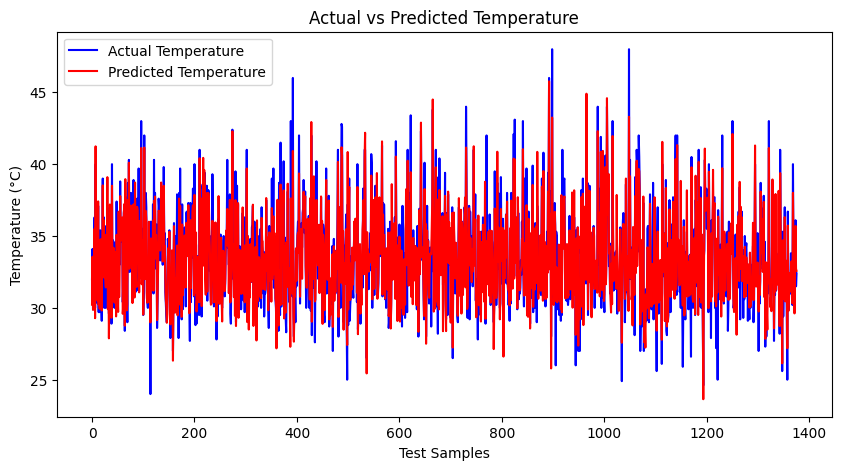

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Test Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


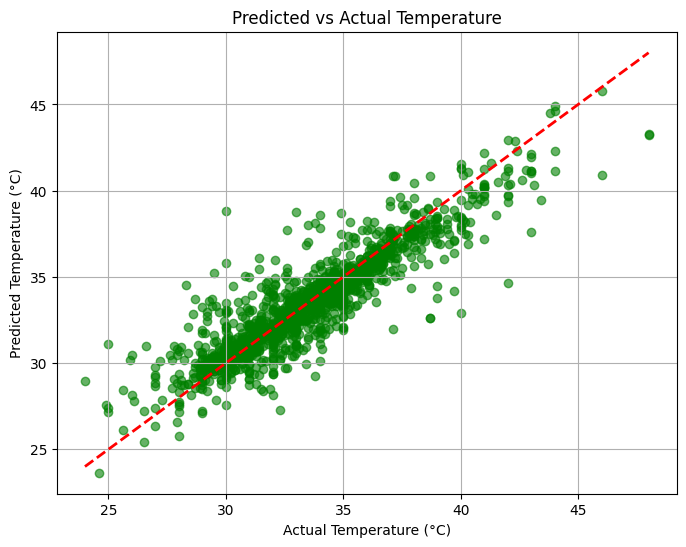

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.title('Predicted vs Actual Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.grid(True)
plt.show()


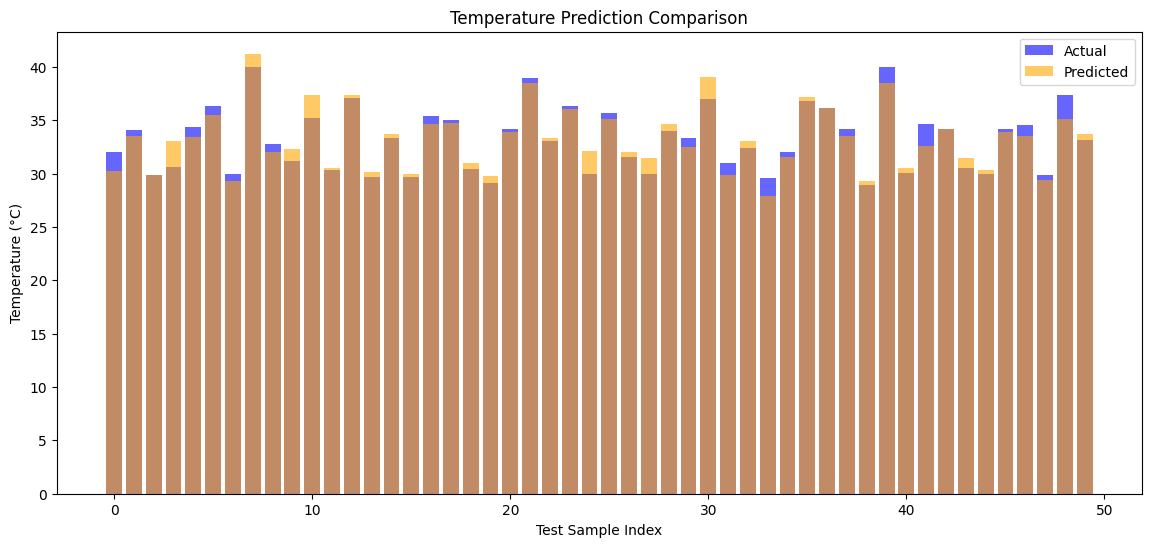

In [ ]:
plt.figure(figsize=(14,6))
n = 50  # number of samples to show
plt.bar(range(n), y_test.values[:n], label='Actual', alpha=0.6, color='blue')
plt.bar(range(n), y_pred[:n], label='Predicted', alpha=0.6, color='orange')
plt.title('Temperature Prediction Comparison')
plt.xlabel('Test Sample Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
# -----------------------------
# 🔹 Future Temperature Prediction
# -----------------------------

# Get the last 3 days from your dataset
recent_data = df.tail(3)['MaxT'].values

# Prepare data in correct shape
input_data = [recent_data.tolist()]  # 2D array format [[day3, day2, day1]]

# Predict tomorrow's temperature
predicted_tomorrow = model.predict(input_data)
print("🌤️ Predicted Temperature for Tomorrow:", round(predicted_tomorrow[0], 2), "°C")


🌤️ Predicted Temperature for Tomorrow: 31.2 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# User enters last 3 days' temperatures
day3 = float(input("Enter temperature 3 days ago: "))
day2 = float(input("Enter temperature 2 days ago: "))
day1 = float(input("Enter temperature 1 day ago: "))

input_data = [[day3, day2, day1]]
predicted_temp = model.predict(input_data)

print("🌤️ Predicted Temperature for Tomorrow:", round(predicted_temp[0], 2), "°C")


Enter temperature 3 days ago: 35
Enter temperature 2 days ago: 41
Enter temperature 1 day ago: 32
🌤️ Predicted Temperature for Tomorrow: 32.19 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
